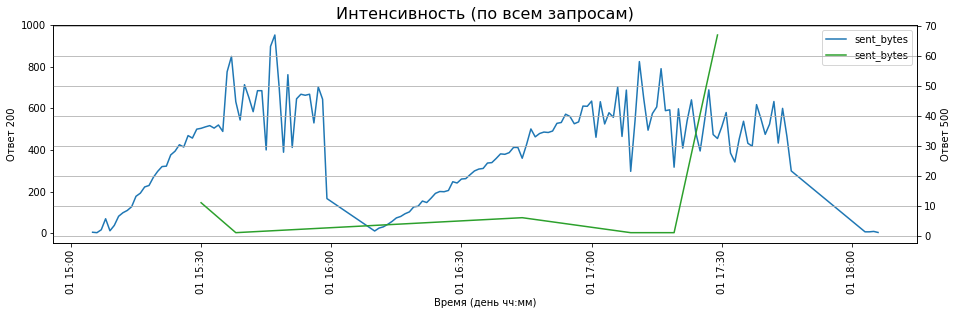

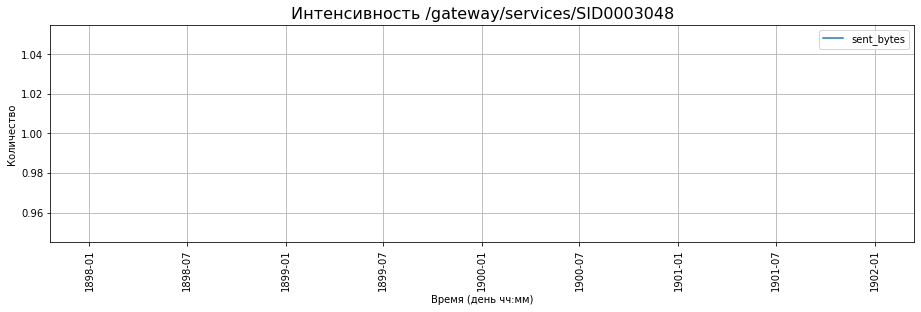

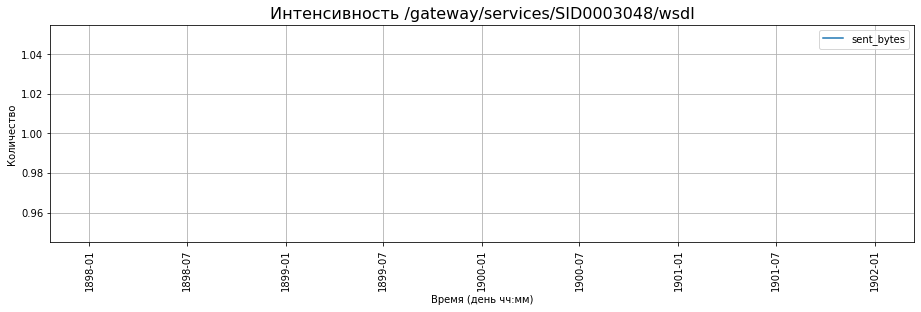

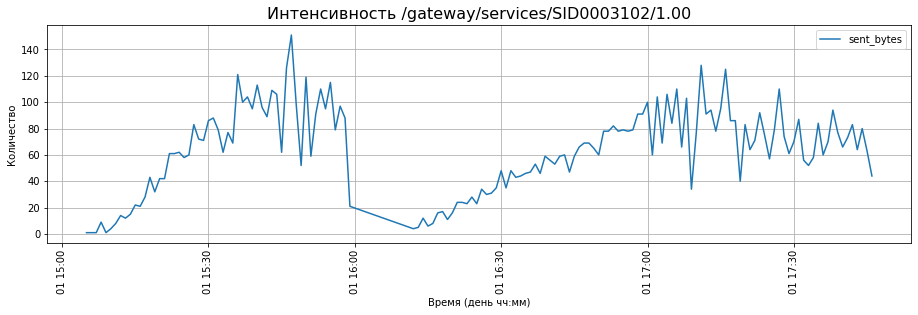

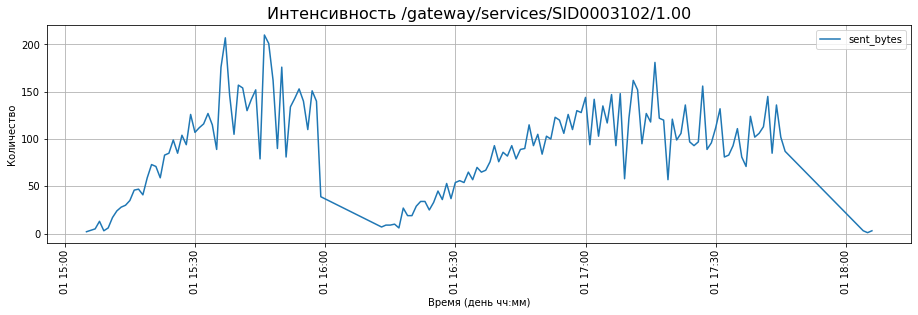

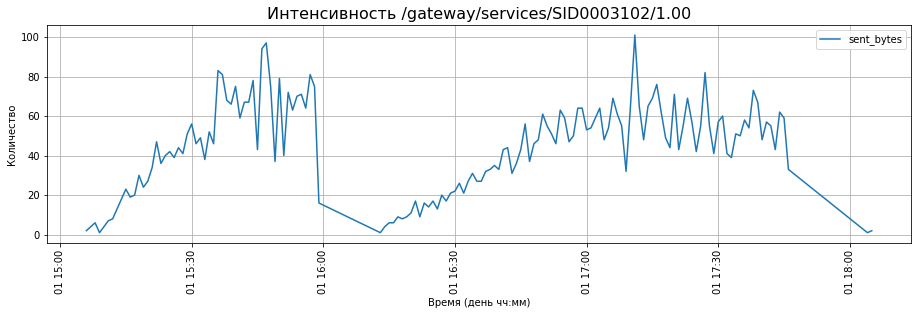

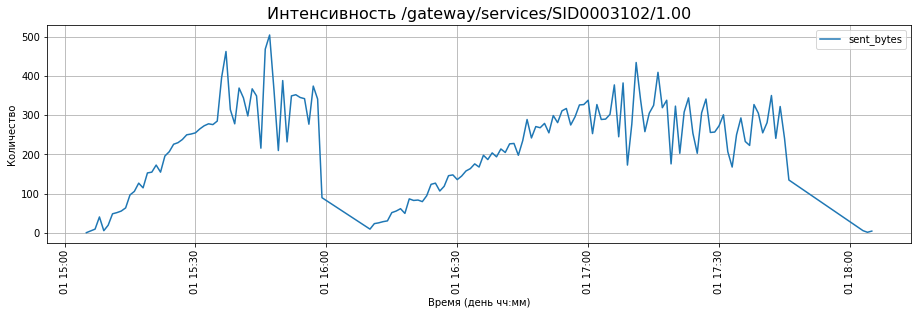

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import re

def set_graph(
    df1, df1_values, title, df1_xlabel, df1_ylabel, 
    df2 = pd.DataFrame(), df2_values = [], df2_ylabel = ''):
    
    ax2 = None
    fig,ax1 = plt.subplots()
    plt.xticks(rotation = 90, fontsize = 10)

    make_line(df1, df1_values)
    
    if df2.empty != True:
        ax2 = ax1.twinx()
        make_line(df2, df2_values, 'tab:green')

        handles, labels = ax1.get_legend_handles_labels()
        handles1, labels1 = ax2.get_legend_handles_labels()
        ax1.legend(
            handles + handles1,
            labels + labels1)
    else:  
        plt.legend() 
        
    print_labels(
        ax1, title,
        df1_xlabel, df1_ylabel,
        ax2, df2_ylabel,)
    
def make_line(df, values, color = None):
    
    values = values.split() 
    for i in range(len(values)):
        df[values[i]] = pd.to_numeric(df[values[i]])
        plt.plot(df.index, df[values[i]], label = values[i], color = color)  

def print_labels(ax1, title, xlabel, ylabel, ax2, second_ylabel = ''):

    plt.grid()
    plt.gcf().subplots_adjust(left = 1, right = 3)
    plt.title(title,fontsize = 16)
    ax1.set_ylabel(ylabel, fontsize = 10)
    ax1.set_xlabel(xlabel, fontsize = 10)
    if ax2 != None:
        ax2.set_ylabel(second_ylabel, fontsize = 10)
        

        
def set_time_interval(df,start,end):
    df = df.loc[(df['timestamp'] >= start) &
                (df['timestamp'] <= end) ]
    return df
    
def format_time(df, time_format):
    df['timestamp'] = pd.to_datetime(df['timestamp'], format=time_format)
    df['timestamp'] = df['timestamp'].dt.strftime('%H:%M:%S')
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S')
    return df
    
def group_by_time(df):
    df = df.groupby(df.index.to_period('Min')).count()
    df.index = df.index.to_timestamp(freq ='Min') 
    return df
    

path = '/home/winterfir/Загрузки/u05smevosb02_srv01_access.log.gz_csv'
df = pd.read_csv(path,
names = ['host','timestamp', 'http-request', 'url', 'http-protocol', 'http-response', 'sent_bytes'], delimiter = ';')
df = set_time_interval(df, '06/Feb/2015:00:00:00 +0300', '06/Feb/2015:23:59:59 +0300')
df = format_time(df, '%d/%b/%Y:%H:%M:%S %z')

df_each = df.copy()

df_ok = df.loc[(df['http-response'] == 200)]
df_ok = df_ok.set_index('timestamp')
df_ok = group_by_time(df_ok)

df_err = df.loc[(df['http-response'] == 500)]
df_err = df_err.set_index('timestamp')
df_err = group_by_time(df_err)


set_graph(df_ok, 'sent_bytes',
          'Интенсивность (по всем запросам)',
          'Время (день чч:мм)',
          'Ответ 200',
          df_err, 'sent_bytes',
          'Ответ 500')


df_each = df_each.set_index(['url', 'timestamp']).sort_index()
df_each = df_each.loc[(df_each['http-response'] == 200)]

for i in range(len(df_each.index.levels[0])-1):
    df = df_each.loc[(df_each.index.get_level_values(0) == df_each.index.unique(level='url')[i])]
 
    df = df.reset_index()
    df = df.set_index('timestamp')
    df = group_by_time(df)
    set_graph(df, 'sent_bytes',
          'Интенсивность '+ df_each.index[i][0],
          'Время (день чч:мм)',
          'Количество')
    
    
plt.show()
    


